# Biomechanical features of orthopedic patients

# Context

Этот классический набор данных содержит ортепедические признаки более 3х сотен пациентов. Это отличный набор для начинающих учиться работать с анализом данных и визуализацией.

# Content

pelvic_incidence - тазовая частота (цифровой)

pelvic_tilt numeric - поясничный наклон (цифровой)

lumbar_lordosis_angle - угол поясничного изгиба позвоночника

sacral_slope - крестцовый наклон

pelvic_radius - тазовый радиус

degree_spondylolisthesis - степень спондилолистеза

class - класс, определяющий наличие отклонений у больного (норма, не норма)

Набор данных содержит 310 выборок и 6 признаков, предназначенных для прогнозирования принадлежности больного к классу в зависимости от признаков.

In [11]:
#numpy – матричные операции
#matplotlib – научная графика
#pandas – таблицы (DataFrame) для анализа данных
#scikit-learn – алгоритмы машинного обучения
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Считываем базу данных из файла
url = 'https://raw.githubusercontent.com/DemchenkoN/DemchenkoN_HW/master/column_2C_weka.csv'
data = pd.read_csv(url, sep = ',', engine='python')

In [3]:
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [4]:
#вывести размерность таблицыы
#выывести названия всех столбцов 
print(data.shape)
print(data.columns)

(310, 7)
Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')


В таблице 310 строк и 7 столбцов

In [5]:
data.index

RangeIndex(start=0, stop=310, step=1)

In [6]:
#Посмотрим общую информацию по набору данных:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


In [7]:
#Статистические характеристики данных по количественным признакам:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


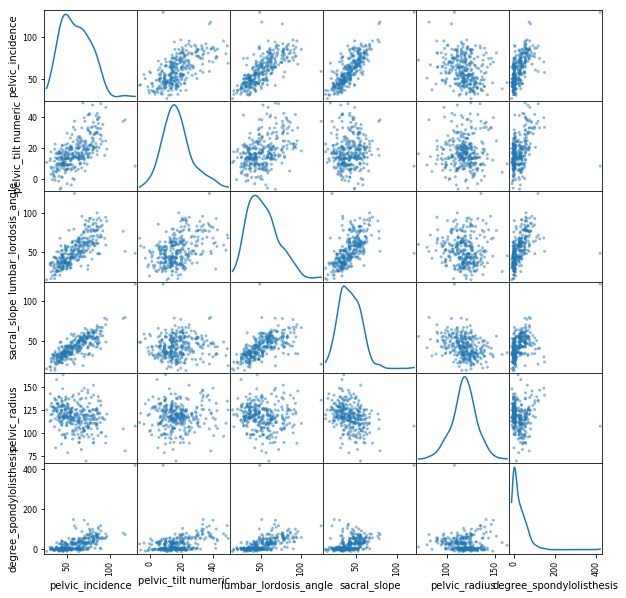

In [8]:
import matplotlib.pyplot as plt
pd.tools.plotting.scatter_matrix(data,alpha=0.5,figsize=(10,10),diagonal="kde")
pass

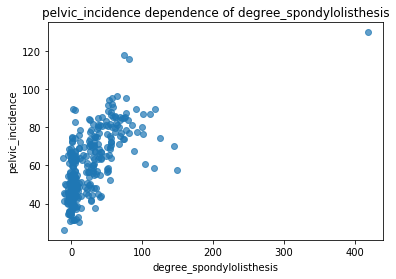

In [13]:
plt.plot(data['degree_spondylolisthesis'], data['pelvic_incidence'], 'o', alpha = 0.7)
plt.xlabel('degree_spondylolisthesis')
plt.ylabel('pelvic_incidence')
plt.title('pelvic_incidence dependence of degree_spondylolisthesis')
pass

# Data preparing

In [14]:
#Разделим имеющиеся столбцы на категориальные и на числовые.
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['class']
['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']


In [15]:
#Для каждого категориального признака выведем все возможные значения:
for c in categorical_columns:
    print(c, data[c].unique())

class ['Abnormal' 'Normal']


In [16]:
#Для каждого числовые признака выведем все возможные значения:
for c in numerical_columns:
    print(c, data[c].unique())

pelvic_incidence [  63.0278175    39.05695098   68.83202098   69.29700807   49.71285934
   40.25019968   53.43292815   45.36675362   43.79019026   36.68635286
   49.70660953   31.23238734   48.91555137   53.5721702    57.30022656
   44.31890674   63.83498162   31.27601184   38.69791243   41.72996308
   43.92283983   54.91944259   63.07361096   45.54078988   36.12568347
   54.12492019   26.14792141   43.58096394   44.5510115    66.87921138
   50.81926781   46.39026008   44.93667457   38.66325708   59.59554032
   31.48421834   32.09098679   35.70345781   55.84328595   52.41938511
   35.49244617   46.44207842   53.85479842   66.28539377   56.03021778
   50.91244034   48.332638     41.35250407   40.55735663   41.76773173
   55.28585178   74.43359316   50.20966979   30.14993632   41.17167989
   47.65772963   43.34960621   46.85578065   43.20318499   48.10923638
   74.37767772   89.68056731   44.529051     77.69057712   76.1472121
   83.93300857   78.49173027   75.64973136   72.07627839   58

# Handeling of empty values

In [17]:
#найдем средние значения всех количественных признаков:
data.median(axis = 0)

pelvic_incidence             58.691038
pelvic_tilt numeric          16.357689
lumbar_lordosis_angle        49.562398
sacral_slope                 42.404912
pelvic_radius               118.268178
degree_spondylolisthesis     11.767934
dtype: float64

In [18]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [19]:
data[numerical_columns].count(axis = 0)

pelvic_incidence            310
pelvic_tilt numeric         310
lumbar_lordosis_angle       310
sacral_slope                310
pelvic_radius               310
degree_spondylolisthesis    310
dtype: int64

In [20]:
data[categorical_columns].count(axis = 0)

class    310
dtype: int64

В наборе данных нет пропущенных значений

# Vectorization

In [21]:
nonbinary_columns = categorical_columns
print(nonbinary_columns)

['class']


In [23]:
data['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [24]:
#Векторизуем категориальные признаки:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['class_Abnormal', 'class_Normal'], dtype='object')


# Normalization of numeric columns

In [25]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [26]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,-9.533593e-16,1.274250e-15,2.728284e-15,-1.767762e-15,-5.942379e-15,4.473124e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.992788e+00,-2.407771e+00,-2.044346e+00,-2.204178e+00,-3.592155e+00,-9.945645e-01
25%,-8.160788e-01,-6.870030e-01,-8.047256e-01,-7.156847e-01,-5.415074e-01,-6.574443e-01
50%,-1.047552e-01,-1.184147e-01,-1.276557e-01,-4.089359e-02,2.609547e-02,-3.868247e-01
75%,7.183029e-01,4.573763e-01,5.965847e-01,7.257680e-01,5.667046e-01,3.991226e-01
max,4.022702e+00,3.186250e+00,3.978183e+00,5.846319e+00,3.390336e+00,1.044347e+01


# X, Y

In [27]:
X = data[['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y = data['class']
feature_names = X.columns

In [28]:
type(feature_names)

pandas.core.indexes.base.Index

In [29]:
print(X.shape)
print(y.shape)
N, d = X.shape

(310, 6)
(310,)


In [30]:
#разобьем данные на обучающую/тестовую выборки в отношении 70%:30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

217 93


# KNN

Метод ближайших соседей. При k=5:

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
# применяем метод predict, считаем среднюю ошибку
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print(err_train, err_test)

0.10599078341 0.204301075269


Получили ошибку на обучающей выборке 10,6%, а на тестовой 20,4%

# Parameters' selection

In [36]:
#Найдем такое значение параметра k, при котором значение ошибки будет минимальным.

from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15]
knn_r = KNeighborsClassifier()
grid = GridSearchCV(knn_r, param_grid = {'n_neighbors': nnb}, cv = 10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.152073732719 3


In [37]:
#Посчитаем ошибки на тестовой и обучающей выборке при подобранном параметре k=3
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print(err_train, err_test)

0.0921658986175 0.182795698925


Получили ошибку на обучающей выборке - 9,2%, а на тестовой - 18,3% Наблюдаем переобучение

# Part 2

In [38]:
#Обучаем классификатор
#Проведем задачу классификации 12 различных форм зданий с помощью нейронных сетей Разобъем данные на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
N_test, _ = X_test.shape

In [41]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100, ), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [42]:
X_test

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
289,44.430701,14.174264,32.243495,30.256437,131.717613,-3.604255
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437
57,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706
60,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906
25,54.124920,26.650489,35.329747,27.474432,121.447011,1.571205
63,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841
92,85.352315,15.844910,71.668660,69.507405,124.419787,76.020603
184,81.056611,20.801492,91.784495,60.255119,125.430176,38.181782
244,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870
46,48.332638,22.227784,36.181993,26.104854,117.384625,6.481709


In [43]:
print(1 - mlp_model.score(X_train, y_train), 1 - mlp_model.score(X_test, y_test))

0.0628019323671 0.242718446602


In [44]:
mlp_model = MLPClassifier(hidden_layer_sizes = (6, ), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [45]:
#Проверка качества регрессора
print(1 - mlp_model.score(X_train, y_train), 1 - mlp_model.score(X_test, y_test))

0.154589371981 0.184466019417


# Selection of alpha parameter and count of neurons

In [46]:
alpha_arr = np.logspace(-4, 5, 25)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (6,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    train_err.append(1 - mlp_model.score(X_train, y_train))
    test_err.append(1 - mlp_model.score(X_test, y_test))

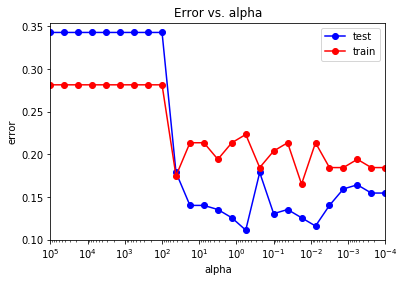

In [47]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [48]:
print(alpha_arr)

[  1.00000000e-04   2.37137371e-04   5.62341325e-04   1.33352143e-03
   3.16227766e-03   7.49894209e-03   1.77827941e-02   4.21696503e-02
   1.00000000e-01   2.37137371e-01   5.62341325e-01   1.33352143e+00
   3.16227766e+00   7.49894209e+00   1.77827941e+01   4.21696503e+01
   1.00000000e+02   2.37137371e+02   5.62341325e+02   1.33352143e+03
   3.16227766e+03   7.49894209e+03   1.77827941e+04   4.21696503e+04
   1.00000000e+05]


In [49]:
#Минимальное значение ошибки
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.111111111111 0.165048543689


In [50]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.0177827941004


# Optimal count of neurons

In [51]:
neurons_arr = np.arange(1, 100)
test_err = []
train_err = []
for neurons in neurons_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neurons, ), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    train_err.append(1 - mlp_model.score(X_train, y_train))
    test_err.append(1 - mlp_model.score(X_test, y_test))

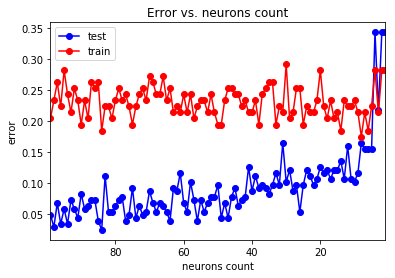

In [52]:
plt.plot(neurons_arr, train_err, 'b-o', label = 'test')
plt.plot(neurons_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()
pass

In [53]:
mlp_model = MLPClassifier(hidden_layer_sizes = (11, ), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
print(1 - mlp_model.score(X_train, y_train), 1 - mlp_model.score(X_test, y_test))

0.106280193237 0.223300970874


In [54]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.024154589372 0.174757281553


In [55]:
#Оптимальное число нейронов
neurons_opt = neurons_arr[test_err == min_test_err]
print(neurons_opt)
neurons_opt = neurons_opt[0]

[8]


# Random Forest

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [57]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 5)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
print(1 - mlp_model.score(X_train, y_train), 1 - mlp_model.score(X_test, y_test))

0.106280193237 0.223300970874


In [59]:
tree_arr = np.arange(1, 20, 5)
test_err = []
train_err = []
oob_err = []

for tree in tree_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = tree, oob_score = True)
    rf.fit(X_train, y_train)
    train_err.append(1 - rf.score(X_train, y_train))
    test_err.append(1 - rf.score(X_test, y_test)) 
    oob_err.append(1 - rf.oob_score_)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates

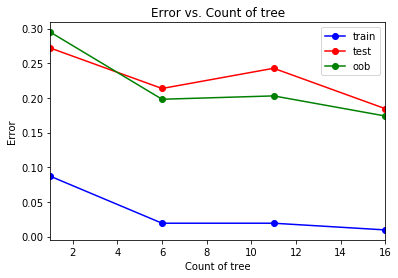

In [60]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

In [61]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.00966183574879
Минимальная ошибка на тестовой выборке:  0.184466019417


In [62]:
#Оптимальное количество деревьев:
tree_opt = tree_arr[test_err == min_test_err]
print(tree_opt)

[16]


# AdaBoost

In [63]:
#Обучаем классификатор вида Ada Boost. Число регрессоров = 5.
ab = ensemble.AdaBoostClassifier(n_estimators = 5)
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=5, random_state=None)

In [64]:
err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.0917874396135
Ошибка на тестовой выборке:  0.174757281553


In [68]:
#Графики зависимости ошибки на тестовой и обучающей выборках от кол-ва деревьев
estimator_arr = np.arange(1, 200, 1)
test_err = []
train_err = []
for estimator in estimator_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators = estimator)
    ab.fit(X_train, y_train)
    train_err.append(1 - ab.score(X_train, y_train))
    test_err.append(1 - ab.score(X_test, y_test))

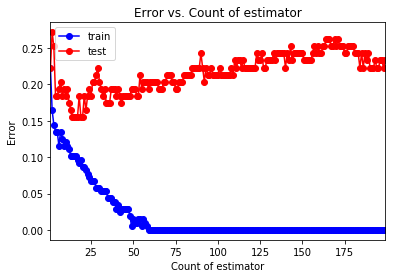

In [69]:
plt.plot(estimator_arr, train_err, 'b-o', label = 'train')
plt.plot(estimator_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(estimator_arr), np.max(estimator_arr)])
plt.title('Error vs. Count of estimator')
plt.xlabel('Count of estimator')
plt.ylabel('Error')
plt.legend()
pass

In [70]:
#Оптимальное число классификаторов
trees_opt = estimator_arr[test_err == min_test_err]
print(trees_opt)

[ 4  5  8 10 18 21 23 25 32 40 42 44 45 46 47 48 52 53]


# Gradient boosted trees

In [73]:
#Обучаем Gradient boosted trees классификатор с количеством деревьев равным 5.
gbt = ensemble.GradientBoostingClassifier(n_estimators = 5)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5, presort='auto',
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [74]:
err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.0917874396135
Ошибка на тестовой выборке:  0.174757281553


In [75]:
tree_arr = np.arange(1, 100, 5)
test_err = []
train_err = []
for tree in tree_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = tree)
    gbt.fit(X_train, y_train)
    train_err.append(1 - gbt.score(X_train, y_train))
    test_err.append(1 - gbt.score(X_test, y_test))

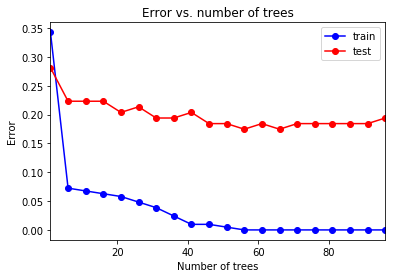

In [76]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
pass

In [77]:
#Минимальные значения ошибок на обучающей и тестовой выборке:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.0
Минимальная ошибка на тестовой выборке:  0.174757281553


In [78]:
#Оптимальное количество деревьев:

trees_opt = tree_arr[test_err == min_test_err]
print(trees_opt)

[56 66]


# Extremely Randomized Trees

In [79]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 10)
ert.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [80]:
#ошибки на тестовой и обучающей выборках
err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print(err_train)
print(err_test)

0.0917874396135
0.174757281553


C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates

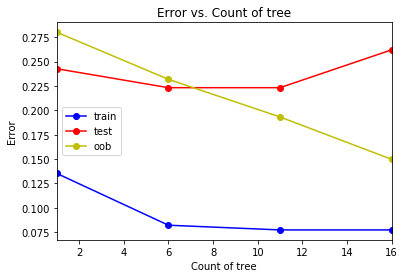

In [81]:
#переобучение
#график зависимости ошибки на тестовой и обучающей выборках и oob-ошибки от количества деревьев
#oob_score = True - определяет использовать ли out-of-bag объекты для оценки
#bootstrap = True - определяет применять ли бустрэп для построения дерева
#как и RF будем регулировать высоту деревьев
tree_arr = np.arange(1, 20, 5)
test_err = []
train_err = []
oob_err = []
for tree in tree_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators = tree, oob_score=True, bootstrap=True, max_depth=7)
    ert.fit(X_train, y_train)
    train_err.append(1 - ert.score(X_train, y_train))
    test_err.append(1 - ert.score(X_test, y_test)) 
    oob_err.append(1 - ert.oob_score_)
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'y-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

In [82]:
#в данном случае переобучение не наблюдается
#Минимальные значения ошибок на обучающей и тестовой выборке
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.0772946859903
0.223300970874


In [83]:
#Оптимальное число деревьев
trees_opt = tree_arr[test_err == min_test_err]
print(trees_opt)

[ 6 11]


# PCA

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [85]:
pca_x = pca.transform(X)

In [86]:
pca_x.shape

(310, 6)

In [87]:
type(pca)

sklearn.decomposition.pca.PCA

In [88]:
pca.explained_variance_

array([  1.78099423e+03,   3.45327067e+02,   1.88776987e+02,
         1.06017924e+02,   8.86140675e+01,   7.20784023e-18])

In [89]:
pca.explained_variance_ratio_

array([  7.09635712e-01,   1.37595291e-01,   7.52180377e-02,
         4.22427563e-02,   3.53082036e-02,   2.87195812e-21])

In [90]:
#Разбиваем данные после применения PCA на обучающую и тестовую выборки. Тестовая выборка содержит 33% данных.
X_train, X_test, y_train, y_test = train_test_split(pca_x, y, test_size = 0.33, random_state = 5)

In [92]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 5)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
#Проверим качество регрессора 

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.00966183574879
Ошибка на тестовой выборке:  0.203883495146


In [94]:
components_arr = np.arange(1, 16, 1)
test_err = []
train_err = []
oob_err = []
for number in components_arr:
    pca = PCA(n_components = 6)
    pca.fit(X)
    pca_x = pca.transform(X)
    pca_x_train, pca_x_test, y_train, y_test = train_test_split(pca_x, y, test_size = 0.33, random_state = 5)
    rf = ensemble.RandomForestClassifier(n_estimators = 2, oob_score = True)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates

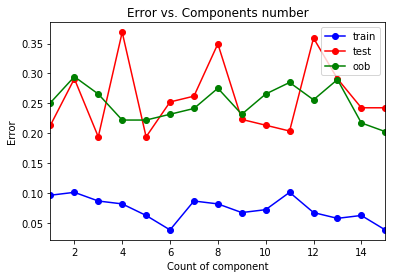

In [95]:
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.plot(components_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(components_arr), np.max(components_arr)])
plt.title('Error vs. Components number')
plt.xlabel('Count of component')
plt.ylabel('Error')
plt.legend()
pass

In [98]:
#Получили график зависимости ошибок от количества компонент.

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)
print ("Получили переобучение")

Минимальная ошибка на обучающей выборке:  0.0386473429952
Минимальная ошибка на тестовой выборке:  0.194174757282
Получили переобучение


In [99]:
#оптимальное число компонент
opt_components_num = components_arr[test_err == min_test_err]
print(opt_components_num)

[3 5]


In [100]:
pca.components_#главные компоненты

array([[  3.23645647e-01,   1.13192291e-01,   3.03674740e-01,
          2.10453357e-01,  -2.99598300e-02,   8.63153779e-01],
       [ -4.76634849e-01,  -9.85632787e-02,  -5.32783979e-01,
         -3.78071570e-01,   3.21809199e-01,   4.82438036e-01],
       [ -1.54481282e-03,  -2.64657410e-01,  -4.96541893e-01,
          2.63112598e-01,  -7.74612852e-01,   1.18940778e-01],
       [  3.73677251e-01,   7.54113757e-01,  -3.39411757e-01,
         -3.80436506e-01,  -1.75106042e-01,  -3.29143086e-02],
       [ -4.41703869e-01,   7.35414748e-02,   5.12024113e-01,
         -5.15245344e-01,  -5.14639730e-01,   8.35992525e-02],
       [  5.77350269e-01,  -5.77350269e-01,  -1.08929532e-11,
         -5.77350269e-01,  -3.59065555e-12,   3.06743519e-12]])

In [101]:
#найдём "оптимальное" кол-во гл.комп.
#Выбираем нужное количество s главных компонент так, чтобы объясненная дисперсия была
#не меньше некоторого заданного уровня α (например, α = 0.95)
#m_pres 175страница
arr_comp=[]
pca_global = PCA( n_components = 6 ,svd_solver='full')
pca_global.fit(X)
result_global=pca_global.transform(X)
sum=0.0
for gl in pca_global.explained_variance_:
    sum+=gl

comp_arr = np.arange(2,7)
for opt in comp_arr:
    pca_comp = PCA( n_components = opt ,svd_solver='full')
    pca_comp.fit(X)
    result_comp=pca_comp.transform(X)
    sum_comp=0.0
    for gl in pca_comp.explained_variance_:
        sum_comp+=gl
    if (sum_comp/sum)>0.95: arr_comp.append(opt)

In [102]:
arr_comp

[4, 5, 6]

In [103]:
ncomp_opt=arr_comp[0]
pca_opt = PCA( n_components = ncomp_opt ,svd_solver='full')
pca_opt.fit(X)
result_opt=pca_opt.transform(X)
X_train, X_test, y_train, y_test = train_test_split(result_opt, y, test_size = 0.33, random_state = 42)

In [104]:
from sklearn import ensemble

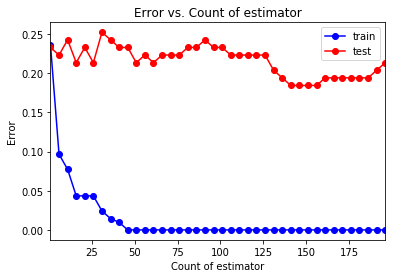

In [107]:
#графики зависимости ошибки от кол.деревьев(adaboost). Кол-во комп. = ncomp_opt
estimator_arr = np.arange(1, 200, 5)
test_err = []
train_err = []
for estimator in estimator_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators = estimator)
    ab.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ab.predict(X_train)))
    test_err.append(np.mean(y_test  != ab.predict(X_test)))
plt.plot(estimator_arr, train_err, 'b-o', label = 'train')
plt.plot(estimator_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(estimator_arr), np.max(estimator_arr)])
plt.title('Error vs. Count of estimator')
plt.xlabel('Count of estimator')
plt.ylabel('Error')
plt.legend()
pass

In [108]:
#Минимальные значения ошибок на обучающей и тестовой выборке

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.0
0.184466019417


In [109]:
#Оптимальное число классификаторов 
trees_opt = estimator_arr[test_err == min_test_err]
print(trees_opt)

[141 146 151 156]


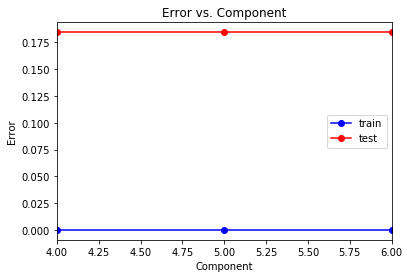

In [121]:
#кол-во главных компонент = формула ml_pres 175page
test_err = []
train_err = []
for ncomp_opt in arr_comp:
    pca_opt = PCA( n_components = ncomp_opt ,svd_solver='full')
    pca_opt.fit(X)
    result_opt=pca_opt.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(result_opt, y, test_size = 0.33, random_state = 42)
    ab = ensemble.AdaBoostClassifier(n_estimators = 150)
    ab.fit(X_train, y_train)
    train_err.append(1 - ab.score(X_train, y_train))
    test_err.append(1 - ab.score(X_test, y_test))
plt.plot(arr_comp, train_err, 'b-o', label = 'train')
plt.plot(arr_comp, test_err, 'r-o', label = 'test')
plt.xlim([np.min(arr_comp), np.max(arr_comp)])
plt.title('Error vs. Component')
plt.xlabel('Component')
plt.ylabel('Error')
plt.legend()
pass

In [122]:
#Минимальные значения ошибок на обучающей и тестовой выборке
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.0
0.184466019417


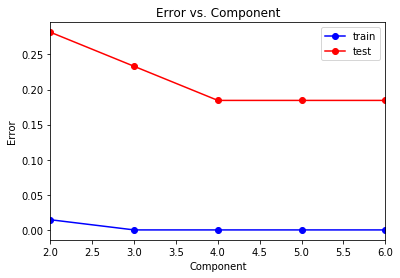

In [124]:
test_err = []
train_err = []
for ncomp_opt in comp_arr:
    pca_opt = PCA( n_components = ncomp_opt ,svd_solver='full')
    pca_opt.fit(X)
    result_opt=pca_opt.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(result_opt, y, test_size = 0.33, random_state = 42)
    ab = ensemble.AdaBoostClassifier(n_estimators = 150)
    ab.fit(X_train, y_train)
    train_err.append(1 - ab.score(X_train, y_train))
    test_err.append(1 - ab.score(X_test, y_test))
plt.plot(comp_arr, train_err, 'b-o', label = 'train')
plt.plot(comp_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(comp_arr), np.max(comp_arr)])
plt.title('Error vs. Component')
plt.xlabel('Component')
plt.ylabel('Error')
plt.legend()
pass

In [125]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.0
0.184466019417


In [126]:
#наилучшее значение количества используемых главных компонент
print(comp_arr[test_err == min_test_err])

[4 5 6]
